In [1]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import scale, StandardScaler
from sklearn.model_selection import train_test_split,GridSearchCV,cross_val_score
from sklearn.metrics import confusion_matrix,accuracy_score,mean_squared_error,r2_score,roc_auc_score,roc_curve,classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import KFold
#from lightgbm import LGBMClassifier
import warnings
warnings.simplefilter(action="ignore")

In [2]:
df=pd.read_csv("C:\\Users\\priyanka reddy\\Downloads\\diabetes.csv")

In [3]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [5]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [6]:
print("Dataset shape:",df.shape)

Dataset shape: (768, 9)


In [7]:
df["Outcome"].value_counts()*100/len(df)

Outcome
0    65.104167
1    34.895833
Name: count, dtype: float64

In [8]:
df.Outcome.value_counts()

Outcome
0    500
1    268
Name: count, dtype: int64

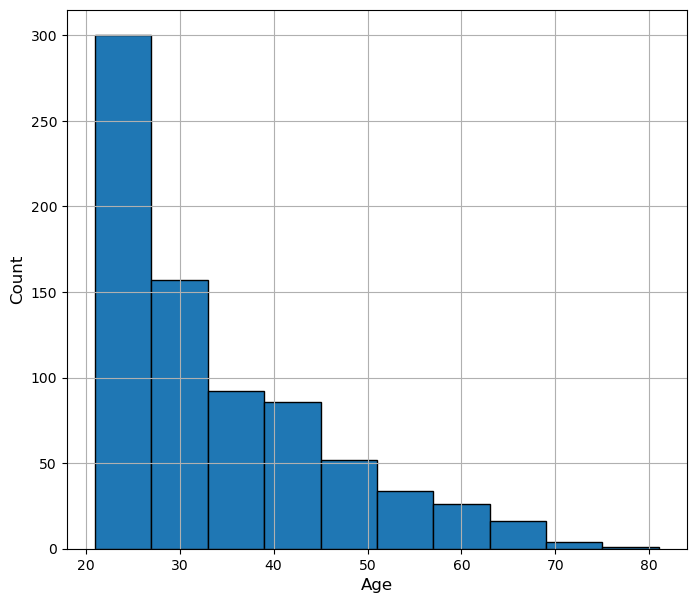

In [9]:
plt.figure(figsize=(8,7))
plt.xlabel("Age",fontsize=12)
plt.ylabel("Count",fontsize=12)
df["Age"].hist(edgecolor="black");

In [10]:
print("Max Age:"+str(df["Age"].max())+","+"Min Age:"+str(df["Age"].min()))

Max Age:81,Min Age:21


<Axes: xlabel='BMI', ylabel='Density'>

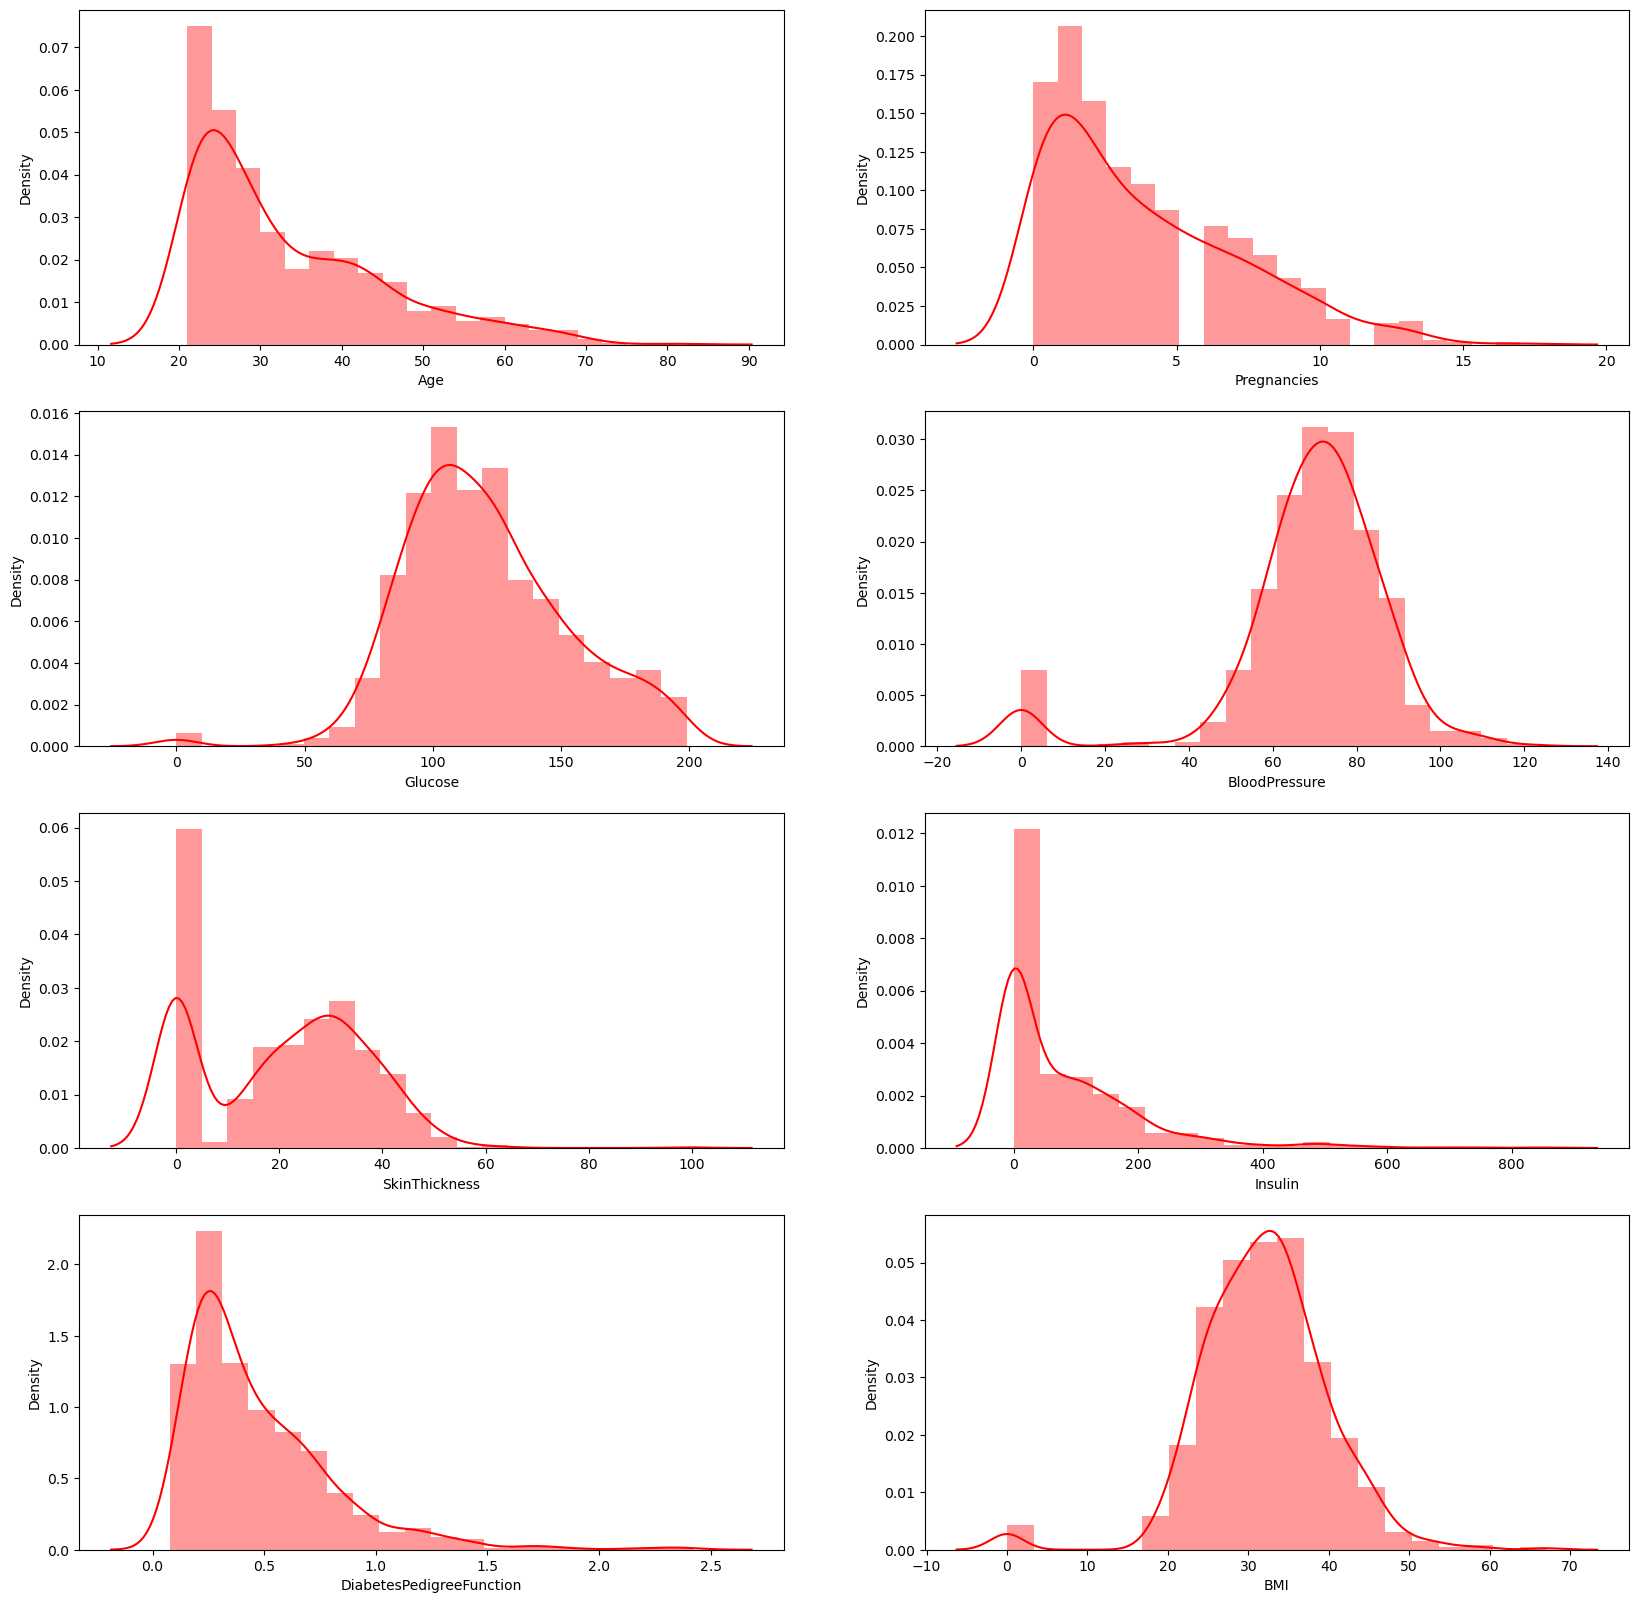

In [11]:
fig, ax=plt.subplots(4,2,figsize=(20,20))
sns.distplot(df.Age,bins=20,ax=ax[0,0],color="red")
sns.distplot(df.Pregnancies,bins=20,ax=ax[0,1],color="red")
sns.distplot(df.Glucose,bins=20,ax=ax[1,0],color="red")
sns.distplot(df.BloodPressure,bins=20,ax=ax[1,1],color="red")
sns.distplot(df.SkinThickness,bins=20,ax=ax[2,0],color="red")
sns.distplot(df.Insulin,bins=20,ax=ax[2,1],color="red")
sns.distplot(df.DiabetesPedigreeFunction,bins=20,ax=ax[3,0],color="red")
sns.distplot(df.BMI,bins=20,ax=ax[3,1],color="red")


In [12]:
df.groupby("Outcome").agg({"Pregnancies":"mean"})

,Pregnancies
Outcome,
0,3.298000
1,4.865672


In [13]:
df.groupby("Outcome").agg({"Age":"mean"})
df.groupby("Outcome").agg({"Age":"max"})

,Age
Outcome,
0,81
1,70


In [14]:
df.groupby("Outcome").agg({"Insulin":"mean"})
df.groupby("Outcome").agg({"Insulin":"max"})

,Insulin
Outcome,
0,744
1,846


In [15]:
df.groupby("Outcome").agg({"Glucose":"mean"})
df.groupby("Outcome").agg({"Glucose":"max"})

,Glucose
Outcome,
0,197
1,199


In [16]:
df.groupby("Outcome").agg({"BMI":"mean"})

,BMI
Outcome,
0,30.304200
1,35.142537


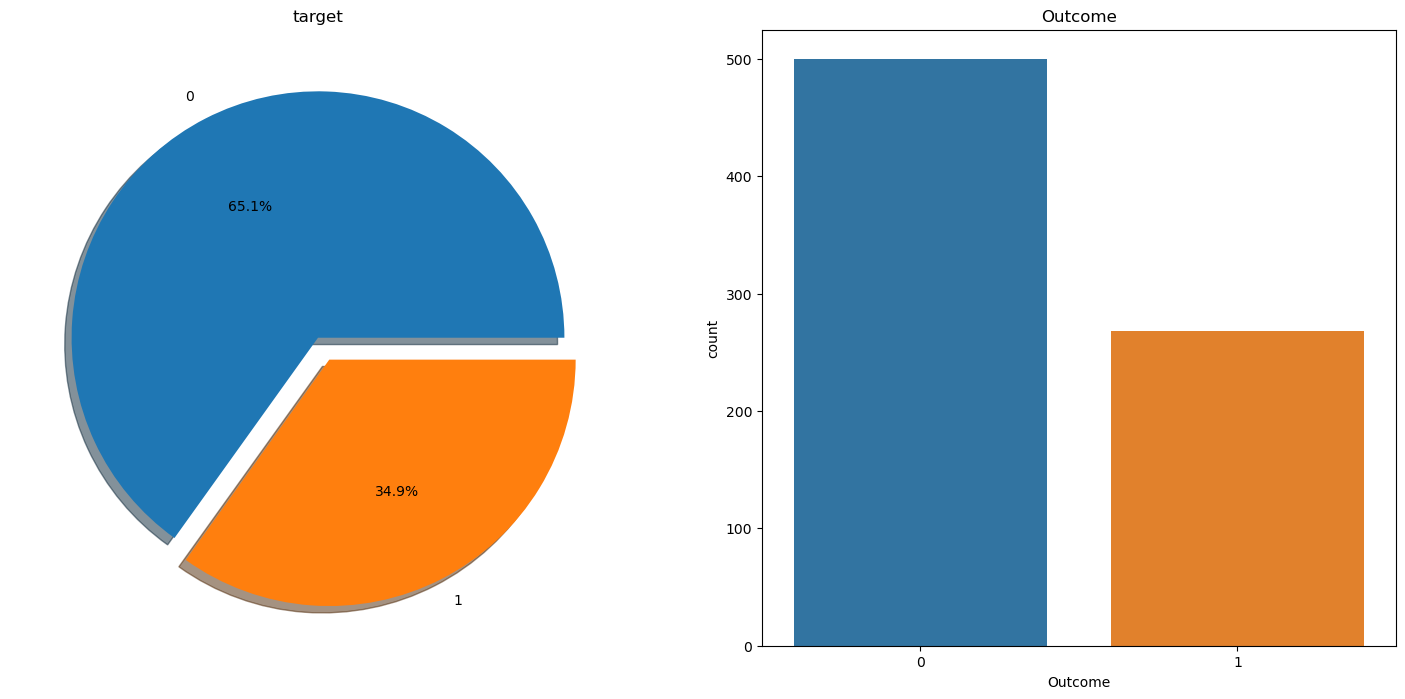

In [17]:
f,ax=plt.subplots(1,2,figsize=(18,8))
df["Outcome"].value_counts().plot.pie(explode=[0,0.1],autopct="%1.1f%%",ax=ax[0],shadow=True)
ax[0].set_title("target")
ax[0].set_ylabel('')
sns.countplot(x="Outcome",data=df,ax=ax[1])
ax[1].set_title("Outcome")
plt.show()

In [18]:
df.corr()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
Glucose,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
BloodPressure,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
SkinThickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
Insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
BMI,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
DiabetesPedigreeFunction,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
Age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
Outcome,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


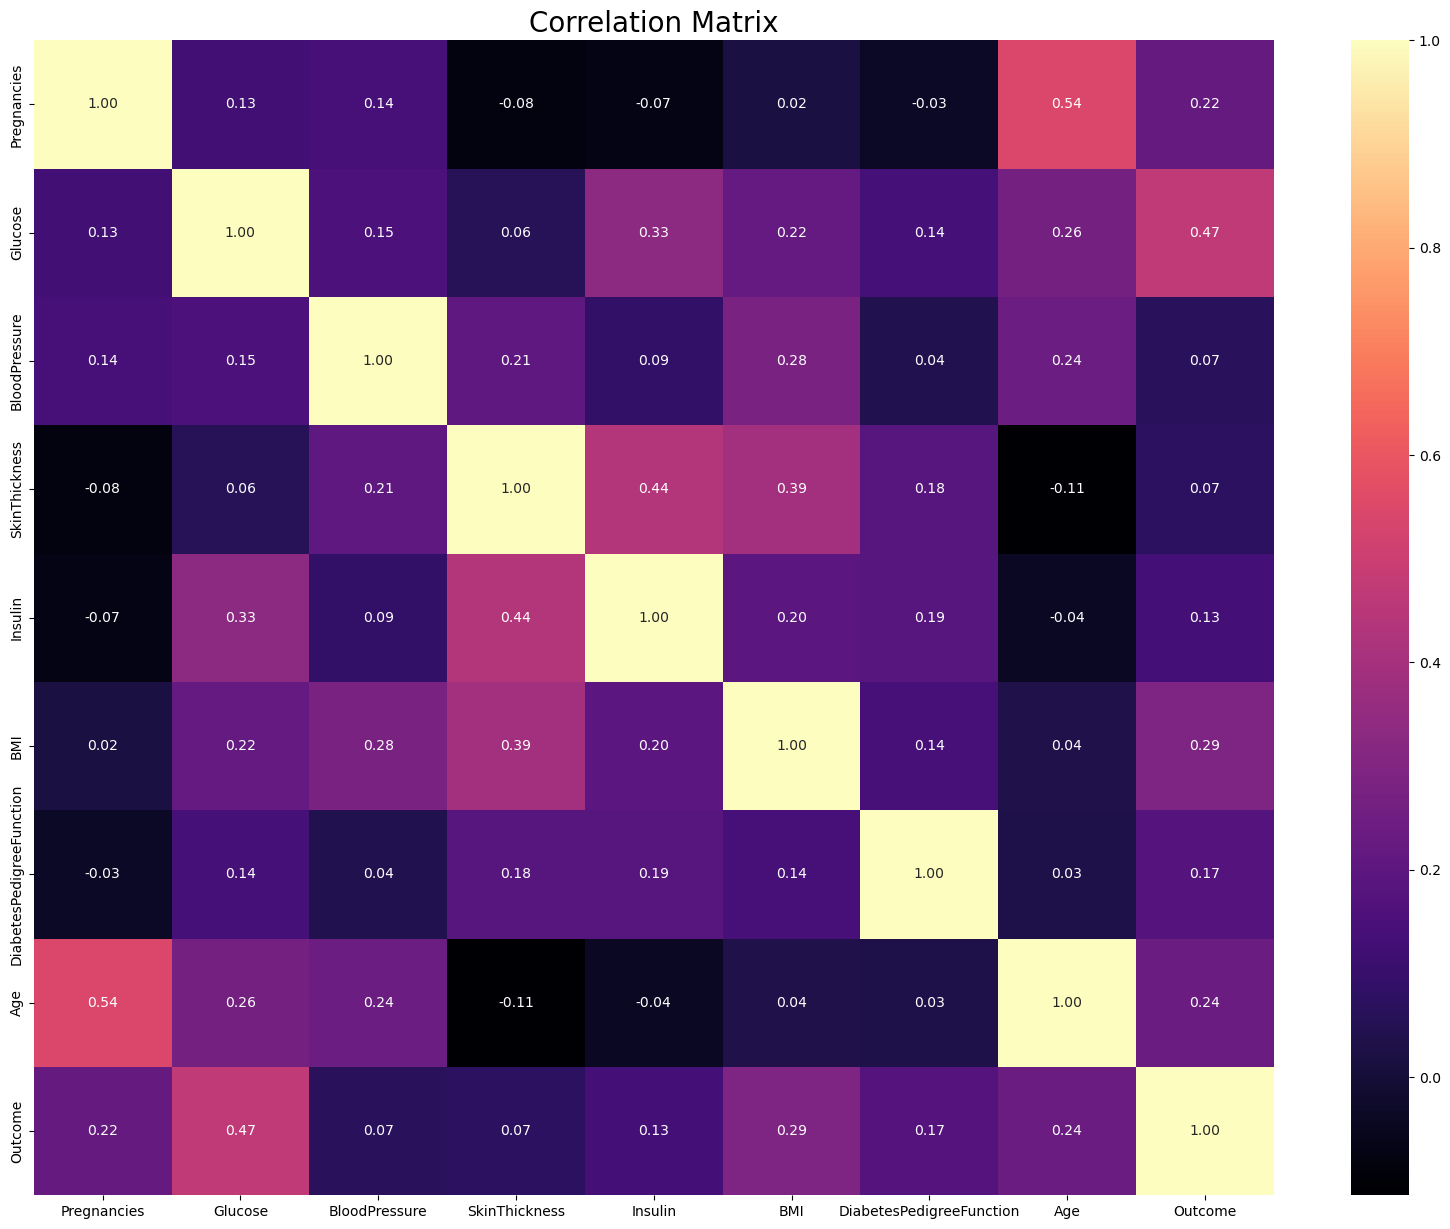

In [19]:
f,ax=plt.subplots(figsize=[20,15])
sns.heatmap(df.corr(),annot=True,fmt=".2f",ax=ax,cmap="magma")
ax.set_title("Correlation Matrix",fontsize=20)
plt.show()

In [20]:
df[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']]=df[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']].replace(0,np.NaN)

In [21]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.0,NaN,33.6,0.627,50,1
1,1,85.0,66.0,29.0,NaN,26.6,0.351,31,0
2,8,183.0,64.0,NaN,NaN,23.3,0.672,32,1
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33,1


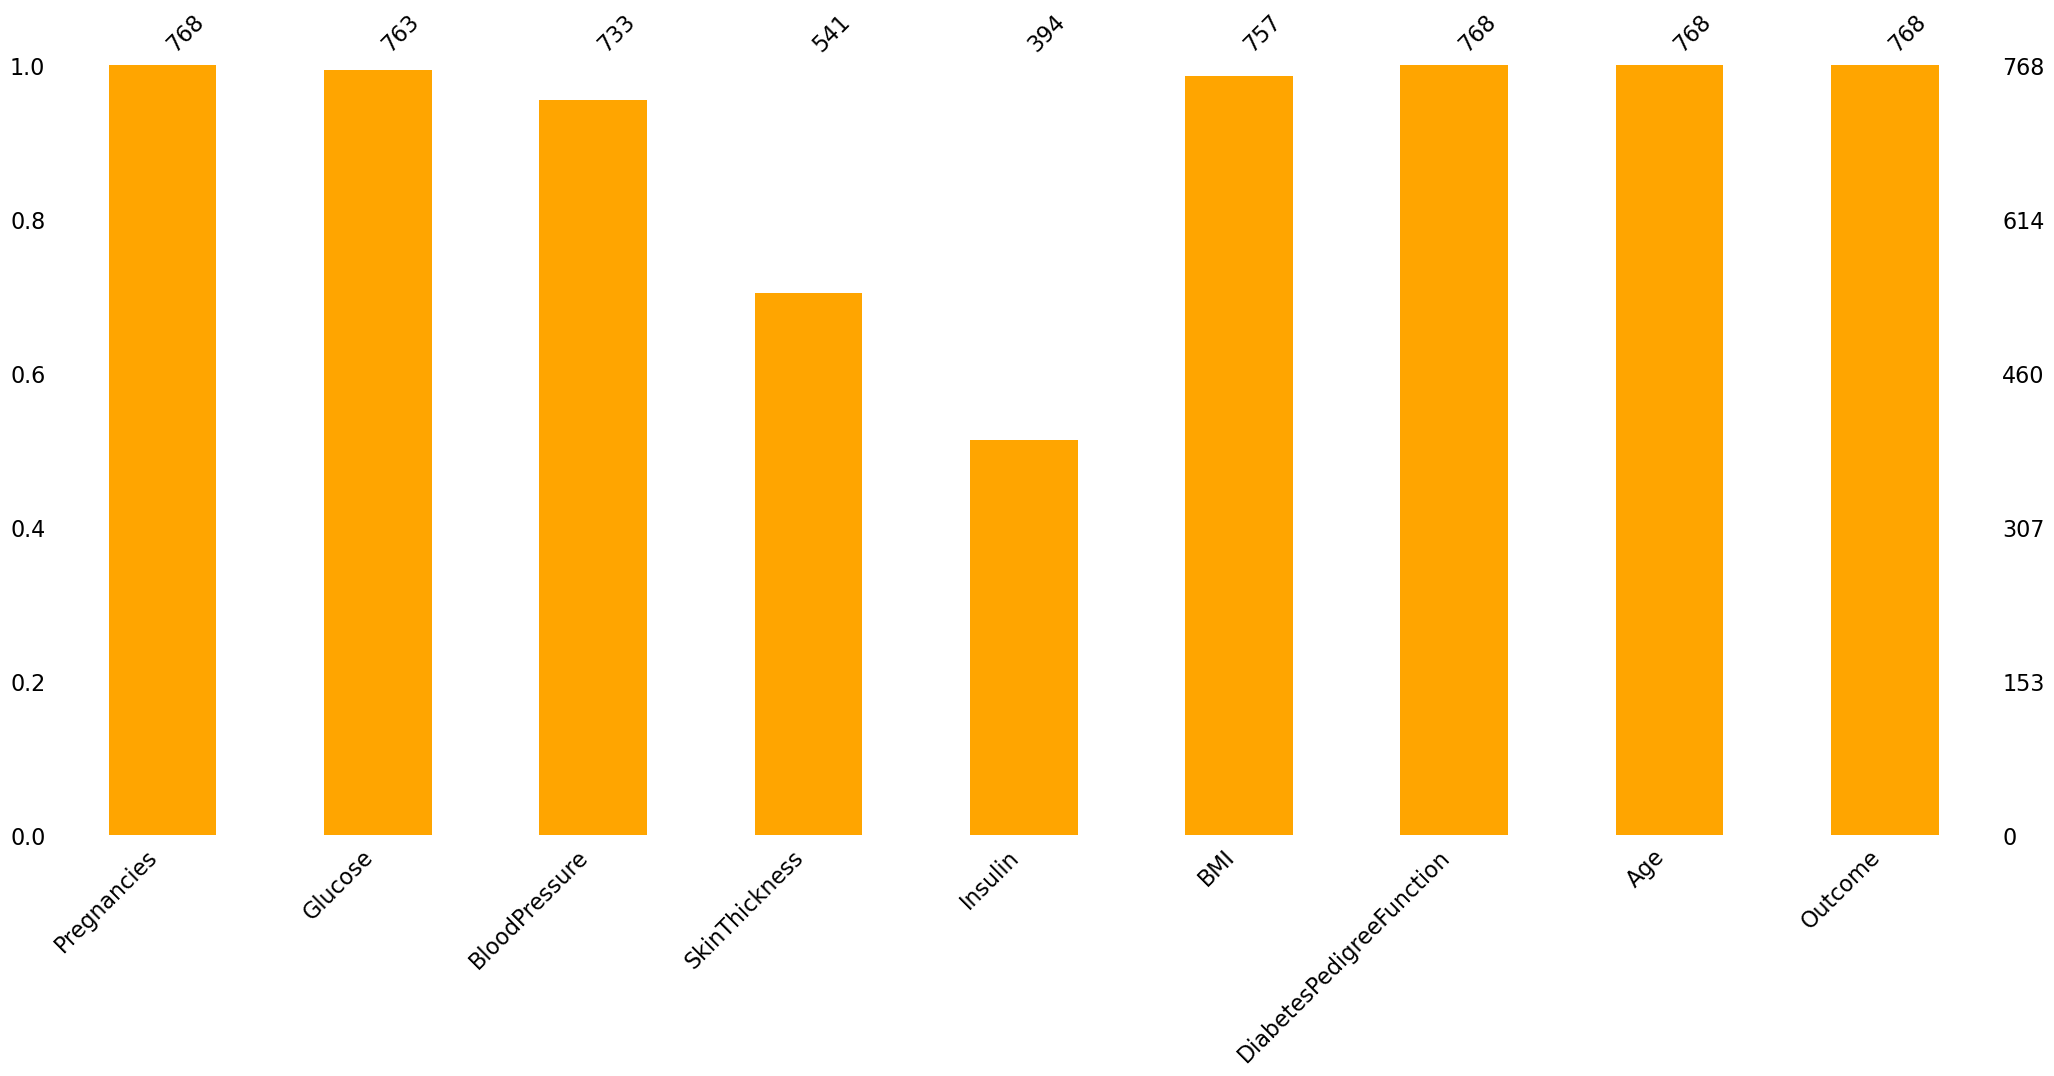

In [22]:
import missingno as msno
msno.bar(df,color="orange");

In [23]:
def median_target(var):
    temp = df[df[var].notnull()]
    temp = temp[[var, 'Outcome']].groupby(['Outcome'])[[var]].median().reset_index()
    return temp


In [24]:
columns = df.columns
columns = columns.drop('Outcome')

for i in columns:
    median_values = median_target(i)
    df.loc[(df['Outcome'] == 0) & (df[i].isnull()), i] = median_values[i][0]
    df.loc[(df['Outcome'] == 1) & (df[i].isnull()), i] = median_values[i][1]


In [25]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.0,169.5,33.6,0.627,50,1
1,1,85.0,66.0,29.0,102.5,26.6,0.351,31,0
2,8,183.0,64.0,32.0,169.5,23.3,0.672,32,1
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33,1


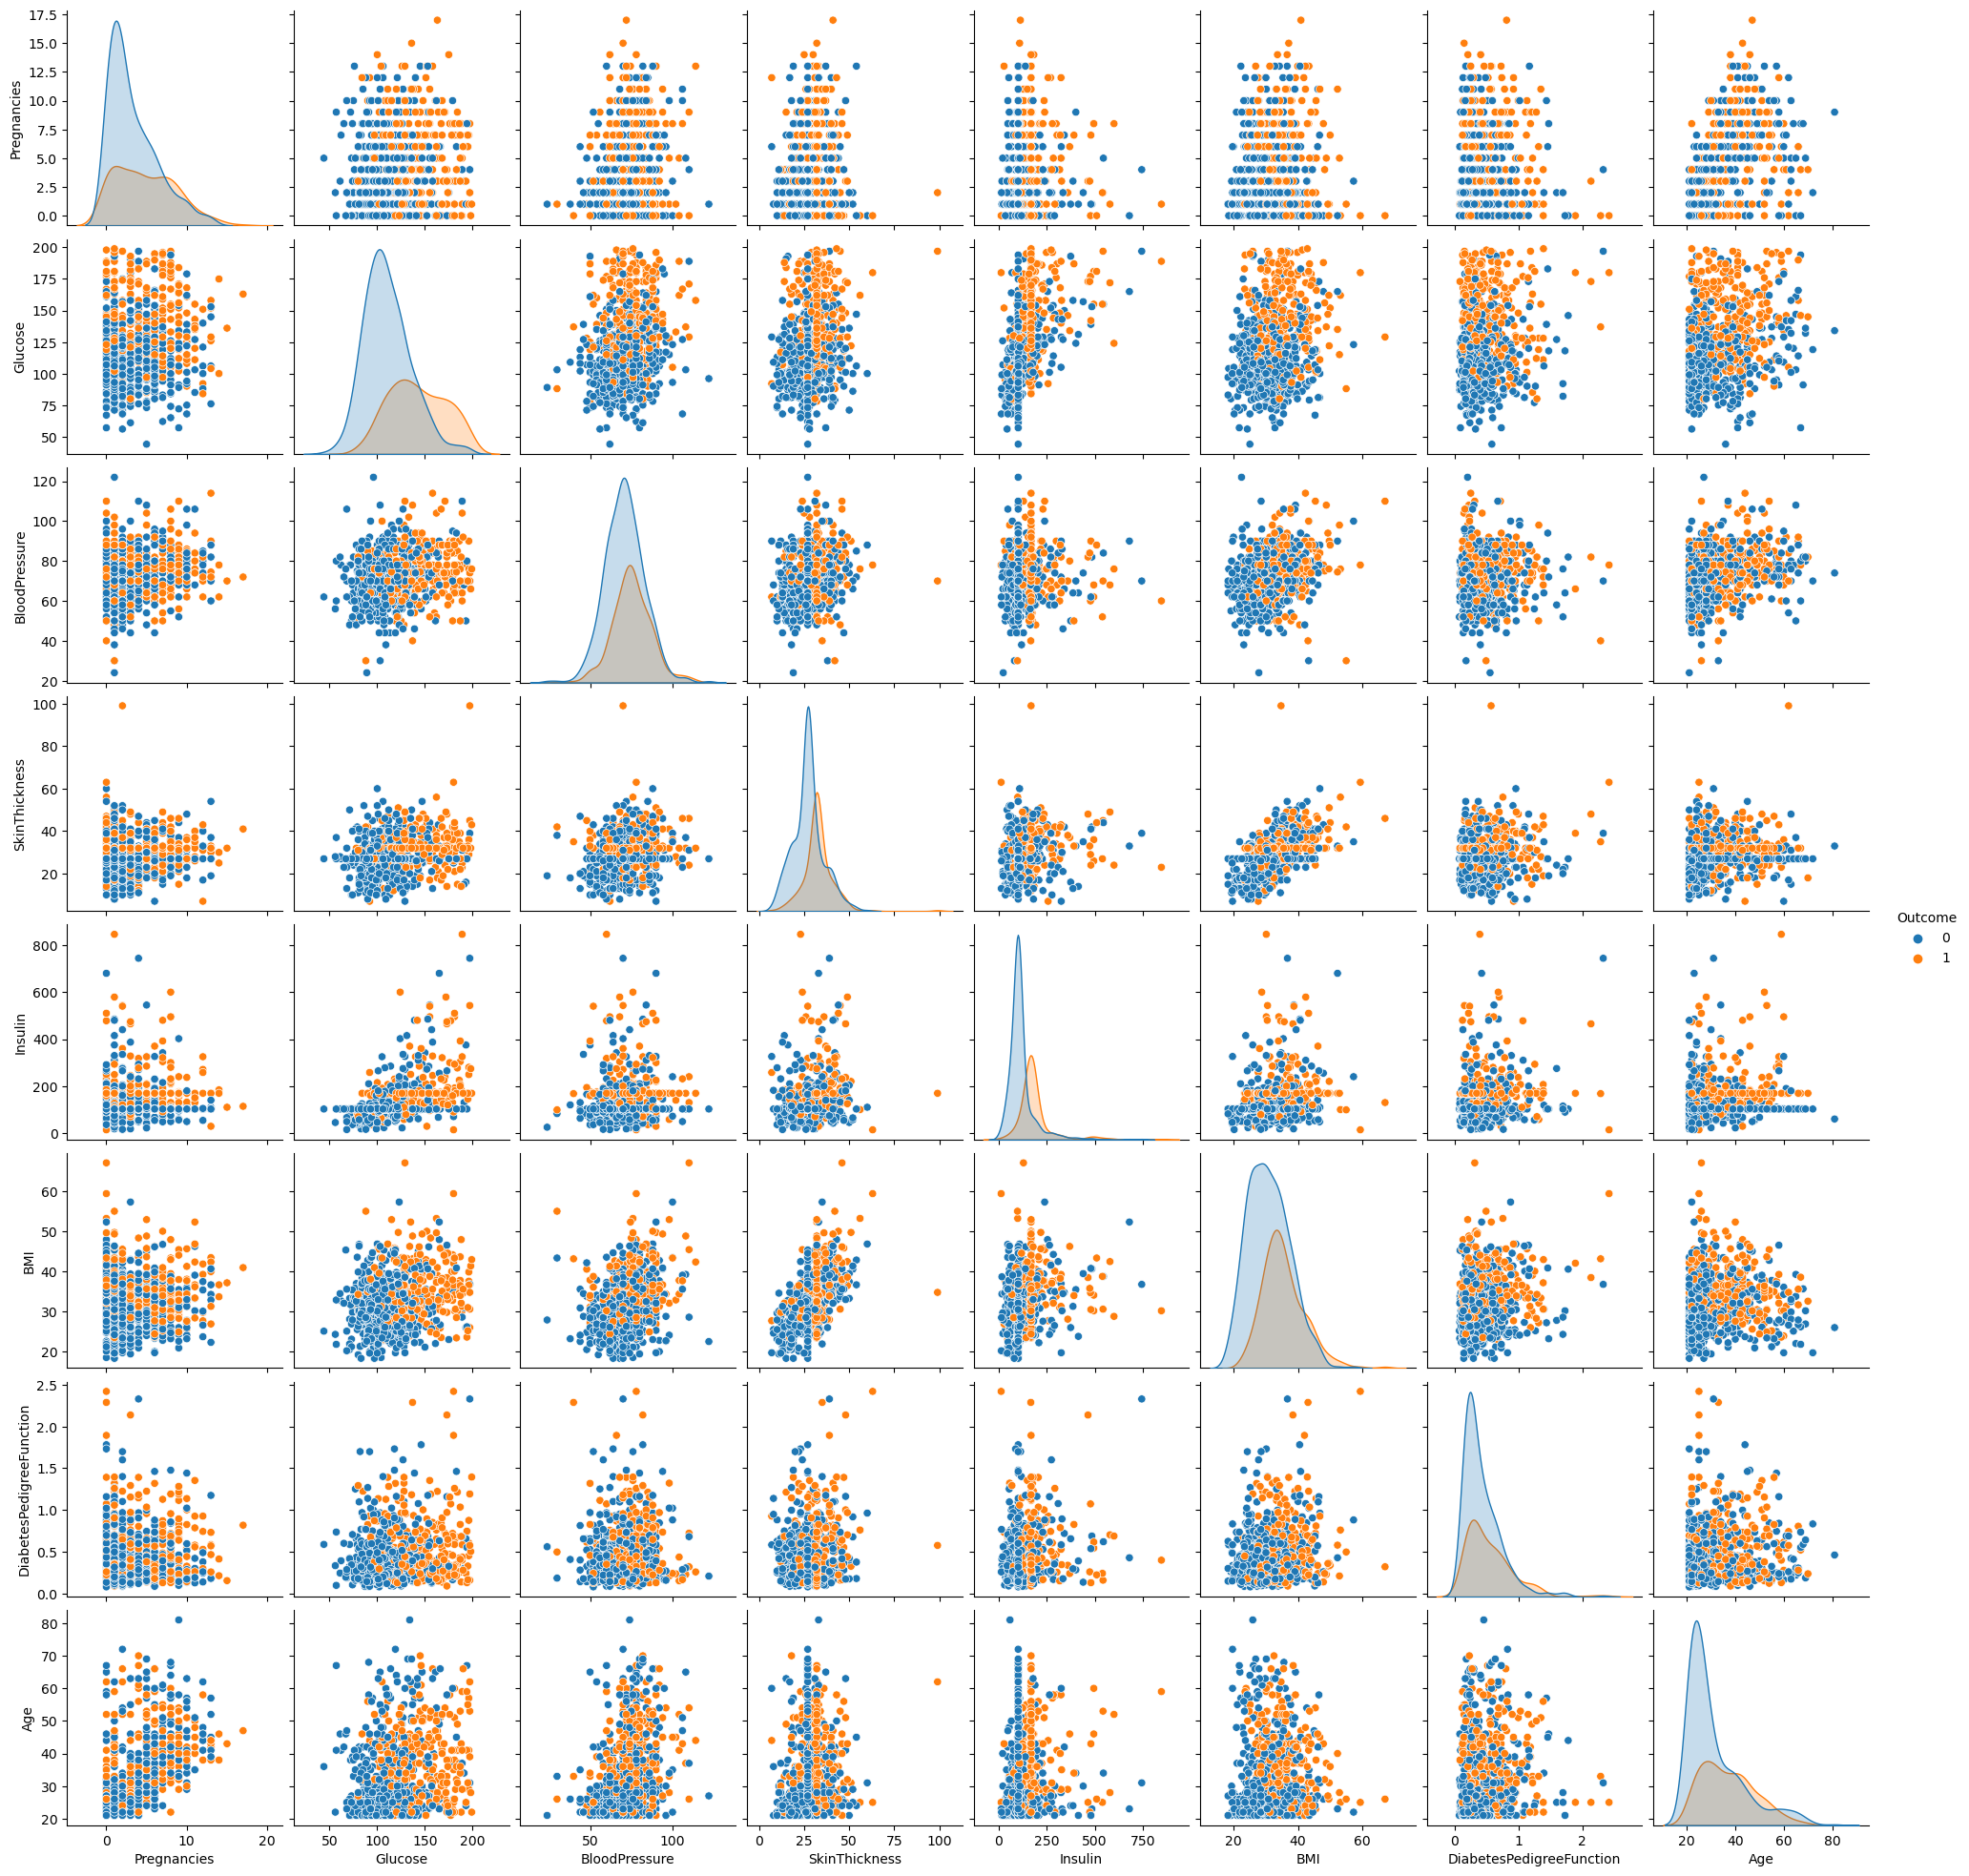

In [26]:
p=sns.pairplot(df,hue="Outcome")

In [27]:
for feature in df:
  Q1=df[feature].quantile(0.25)
  Q3=df[feature].quantile(0.75)
  IQR=Q3-Q1
  lower=Q1-1.5*IQR
  upper=Q3+1.5*IQR
  if df[(df[feature]>upper)].any(axis=None):
    print(feature,"yes")
  else:
    print(feature,"no")

Pregnancies yes
Glucose no
BloodPressure yes
SkinThickness yes
Insulin yes
BMI yes
DiabetesPedigreeFunction yes
Age yes
Outcome no


<Axes: xlabel='Insulin'>

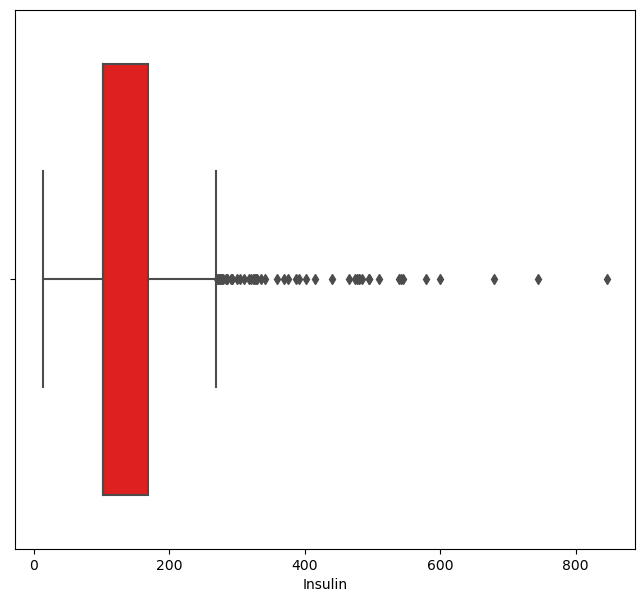

In [28]:
import seaborn as sns
plt.figure(figsize=(8,7))
sns.boxplot(x=df["Insulin"],color="red")

In [29]:
Q1=df.Insulin.quantile(0.25)
Q3=df.Insulin.quantile(0.75)
IQR=Q3-Q1
lower=Q1-1.5*IQR
upper=Q3+1.5*IQR
df.loc[df["Insulin"]>upper,"Insulin"]=upper


<Axes: xlabel='Insulin'>

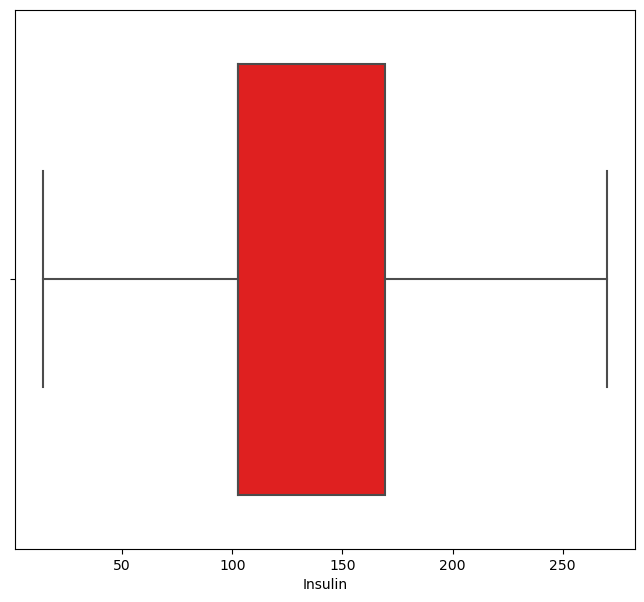

In [30]:
import seaborn as sns
plt.figure(figsize=(8,7))
sns.boxplot(x=df["Insulin"],color="red")

In [31]:
from sklearn.neighbors import LocalOutlierFactor
lof=LocalOutlierFactor(n_neighbors=10)
lof.fit_predict(df)


array([ 1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1, -1,  1,  1,  1,  1, -1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1, -1,  1,  1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1, -1,  1,  1

In [32]:
df_scores=lof.negative_outlier_factor_
np.sort(df_scores)[0:30]

array([-3.05893469, -2.37289269, -2.15297995, -2.09708735, -2.0772561 ,
       -1.95255968, -1.86384019, -1.74003158, -1.72703492, -1.71674689,
       -1.70343883, -1.6688722 , -1.64296768, -1.64190437, -1.61620872,
       -1.61369917, -1.60057603, -1.5988774 , -1.59608032, -1.57027568,
       -1.55876022, -1.55674614, -1.51852389, -1.50843907, -1.50280943,
       -1.50160698, -1.48391514, -1.4752983 , -1.4713427 , -1.47006248])

In [33]:
threshold=np.sort(df_scores)[7]
threshold

-1.740031580305444

In [34]:
outlier=df_scores>threshold
df=df[outlier]
df.shape

(760, 9)

In [35]:
NewBMI=pd.Series(["Underweight","Normal","Overweight","Obesity 1","Obesity 2","Obesity 3"],dtype="category")
df["NewBMI"]=NewBMI
df.loc[df["BMI"]<18.5,"NewBMI"]=NewBMI[0]
df.loc[(df["BMI"]>18.5)&(df["BMI"]<=24.9),"NewBMI"]=NewBMI[1]
df.loc[(df["BMI"]>24.9)&(df["BMI"]<=29.9),"NewBMI"]=NewBMI[2]
df.loc[(df["BMI"]>29.9)&(df["BMI"]<=34.9),"NewBMI"]=NewBMI[3]
df.loc[(df["BMI"]>34.9)&(df["BMI"]<=39.9),"NewBMI"]=NewBMI[4]
df.loc[df["BMI"]>39.9,"NewBMI"]=NewBMI[5]


In [36]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,NewBMI
0,6,148.0,72.0,35.0,169.5,33.6,0.627,50,1,Obesity 1
1,1,85.0,66.0,29.0,102.5,26.6,0.351,31,0,Overweight
2,8,183.0,64.0,32.0,169.5,23.3,0.672,32,1,Normal
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0,Overweight
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33,1,Obesity 3


In [37]:
def set_insulin(row):
  if row["Insulin"]>=16 and row["Insulin"]<=166:
    return "Normal"
  else:
    return "Abnormal"

df=df.assign(NewInsulinScore=df.apply(set_insulin,axis=1))

In [38]:
NewGlucose=pd.Series(["Low","Normal","Overweight","Secret","High"],dtype="category")
df["NewGlucose"]=NewGlucose
df.loc[df["Glucose"]<=70,"NewGlucose"]=NewGlucose[0]
df.loc[(df["Glucose"]>70)&(df["Glucose"]<=99),"NewGlucose"]=NewGlucose[1]
df.loc[(df["Glucose"]>99)&(df["Glucose"]<=126),"NewGlucose"]=NewGlucose[2]
df.loc[df["Glucose"]>126,"NewGlucose"]=NewGlucose[3]


In [39]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,NewBMI,NewInsulinScore,NewGlucose
0,6,148.0,72.0,35.0,169.5,33.6,0.627,50,1,Obesity 1,Abnormal,Secret
1,1,85.0,66.0,29.0,102.5,26.6,0.351,31,0,Overweight,Normal,Normal
2,8,183.0,64.0,32.0,169.5,23.3,0.672,32,1,Normal,Abnormal,Secret
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0,Overweight,Normal,Normal
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33,1,Obesity 3,Abnormal,Secret


In [40]:
df=pd.get_dummies(df,columns=["NewBMI","NewInsulinScore","NewGlucose"],drop_first=True)

In [41]:
categorical_df=df[["NewBMI_Obesity 1","NewBMI_Obesity 2","NewBMI_Obesity 3","NewBMI_Overweight","NewBMI_Underweight",
                   "NewInsulinScore_Normal","NewGlucose_Low","NewGlucose_Normal","NewGlucose_Overweight","NewGlucose_Secret"]]

In [42]:
categorical_df.head()

,NewBMI_Obesity 1,NewBMI_Obesity 2,NewBMI_Obesity 3,NewBMI_Overweight,NewBMI_Underweight,NewInsulinScore_Normal,NewGlucose_Low,NewGlucose_Normal,NewGlucose_Overweight,NewGlucose_Secret
0,True,False,False,False,False,False,False,False,False,True
1,False,False,False,True,False,True,False,True,False,False
2,False,False,False,False,False,False,False,False,False,True
3,False,False,False,True,False,True,False,True,False,False
4,False,False,True,False,False,False,False,False,False,True


In [43]:
y=df["Outcome"]
X=df.drop(["Outcome","NewBMI_Obesity 1","NewBMI_Obesity 2","NewBMI_Obesity 3","NewBMI_Overweight","NewBMI_Underweight",
                   "NewInsulinScore_Normal","NewGlucose_Low","NewGlucose_Normal","NewGlucose_Overweight","NewGlucose_Secret"],axis=1)
cols=X.columns
print(columns)
index=X.index

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age'],
      dtype='object')


In [44]:
from sklearn.preprocessing import RobustScaler
transformer=RobustScaler().fit(X)
X=transformer.transform(X)
X=pd.DataFrame(X,columns=cols,index=index)

In [45]:
X=pd.concat([X,categorical_df],axis=1)
columns_to_drop = ["NewBMI_Obesity 1","NewBMI_Obesity 2","NewBMI_Obesity 3","NewBMI_Overweight","NewBMI_Underweight",
                   "NewInsulinScore_Normal","NewGlucose_Low","NewGlucose_Normal","NewGlucose_Overweight","NewGlucose_Secret"]

# Drop the specified columns from X
X = X.drop(columns=columns_to_drop)
print(X.columns)

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age'],
      dtype='object')


In [46]:
import pickle
#pickle.dump(models[2], open("diabetes","wb"))

LR: 0.802632 (0.034312)
KKN: 0.859211 (0.030604)


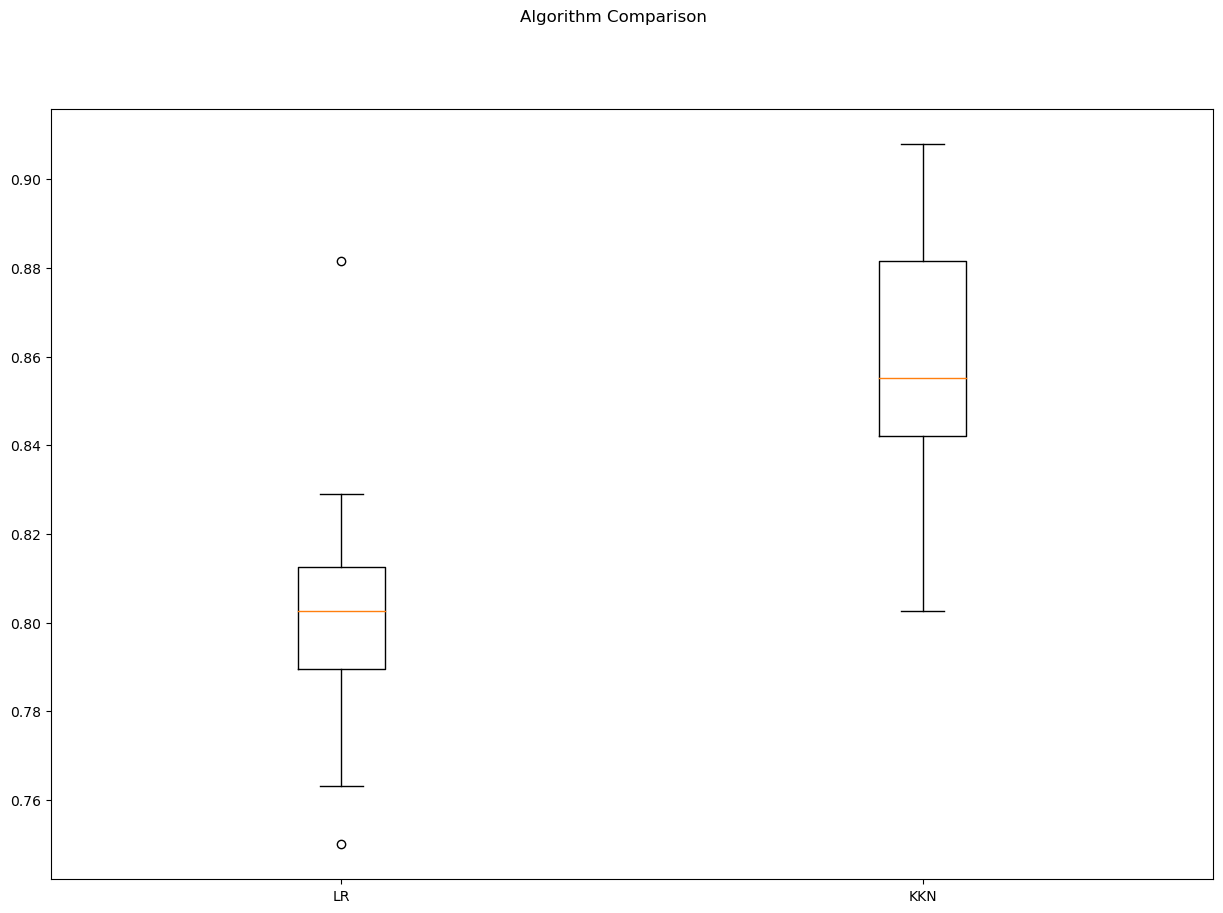

In [47]:
from sklearn.model_selection import KFold, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier

from sklearn.svm import SVC
import matplotlib.pyplot as plt

# Define the list of models
models = []
models.append(("LR", LogisticRegression(random_state=12345)))
models.append(("KKN", KNeighborsClassifier()))


results = []
names = []

for name, model in models:
    kfold = KFold(n_splits=10)
    cv_results = cross_val_score(model, X, y, cv=kfold, scoring="accuracy")
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

fig = plt.figure(figsize=(15, 10))
fig.suptitle("Algorithm Comparison")
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

In [48]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(random_state=12345)
model.fit(X,y)
kfold = KFold(n_splits=10)
cv_results = cross_val_score(model, X, y, cv=kfold, scoring="accuracy")
print("Random Forest:", cv_results.mean())


Random Forest: 0.8868421052631579


# saving RF model

In [49]:
with open("diabetes.pkl", "wb") as model_file:
    pickle.dump(model, model_file)